In [10]:
RAW_DATA_PATH='/home/sagemaker-user/studio/src/new-rider-v3/data'

In [11]:
import pandas as pd
import os

In [13]:
df_train = pd.read_csv(os.path.join(RAW_DATA_PATH, 'train_df.csv'))

/tmp/ipykernel_19631/2564854109.py:1: DtypeWarning: Columns (201,202,221,228) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(os.path.join(RAW_DATA_PATH, 'train_df.csv'))


In [14]:
# Get basic info about the dataframe
print("DataFrame Info:")
print("-" * 50)
print(f"Number of rows: {len(df_train):,}")
print(f"Number of columns: {len(df_train.columns):,}")
print("\nMemory usage: {:.2f} MB".format(df_train.memory_usage().sum() / 1024**2))

print("\nColumn Data Types:")
print("-" * 50)
print(df_train.dtypes.value_counts())

print("\nSample of Columns:")
print("-" * 50)
print(df_train.columns[:10].tolist())

print("\nMissing Values Summary:")
print("-" * 50)
missing = df_train.isnull().sum()
missing = missing[missing > 0]
print(missing.sort_values(ascending=False).head())

print("\nNumeric Columns Statistics:")
print("-" * 50)
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
print(df_train[numeric_cols].describe())

print("\nCategorical Columns Value Counts:")
print("-" * 50)
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols[:3]:  # Show first 3 categorical columns
    print(f"\n{col}:")
    print(df_train[col].value_counts().head())


DataFrame Info:
--------------------------------------------------
Number of rows: 740,301
Number of columns: 271

Memory usage: 1530.62 MB

Column Data Types:
--------------------------------------------------
float64    224
object      43
int64        4
dtype: int64

Sample of Columns:
--------------------------------------------------
['ds', 'rider_lyft_id', 'purchase_session_id', 'bundle_set_id', 'ride_id', 'rider_session_id', 'requester_lyft_id', 'occurred_at', 'requested_at', 'requested_ride_type']

Missing Values Summary:
--------------------------------------------------
candidate_product_key          740301
destination_airport_code       738848
origin_airport_code            738639
courier_reserve_final_price    737254
time_category                  708118
dtype: int64

Numeric Columns Statistics:
--------------------------------------------------
       rider_lyft_id       ride_id  requester_lyft_id          dice  \
count   7.403010e+05  7.403010e+05       7.403010e+05  7.403

In [15]:
# Print all column names in an easy to read format
print("All DataFrame Columns:")
print("-" * 50)
for i, col in enumerate(df_train.columns, 1):
    print(f"{i:3d}. {col}")


All DataFrame Columns:
--------------------------------------------------
  1. ds
  2. rider_lyft_id
  3. purchase_session_id
  4. bundle_set_id
  5. ride_id
  6. rider_session_id
  7. requester_lyft_id
  8. occurred_at
  9. requested_at
 10. requested_ride_type
 11. dice
 12. region
 13. passenger_device
 14. pax_carrier
 15. pax_os
 16. currency
 17. last_product_key
 18. second_last_product_key
 19. third_last_product_key
 20. fourth_last_product_key
 21. fifth_last_product_key
 22. favorite_product_key_28d
 23. favorite_product_key_90d
 24. origin_venue_category
 25. destination_venue_category
 26. standard_availability_caveat
 27. plus_availability_caveat
 28. premium_availability_caveat
 29. lux_availability_caveat
 30. luxsuv_availability_caveat
 31. standard_saver_availability_caveat
 32. fastpass_availability_caveat
 33. card_issuer
 34. forecast_hr_gh4_precip_type
 35. forecast_hr_gh4_summary
 36. place_category_pickup
 37. place_category_destination
 38. dock_only_electric_b

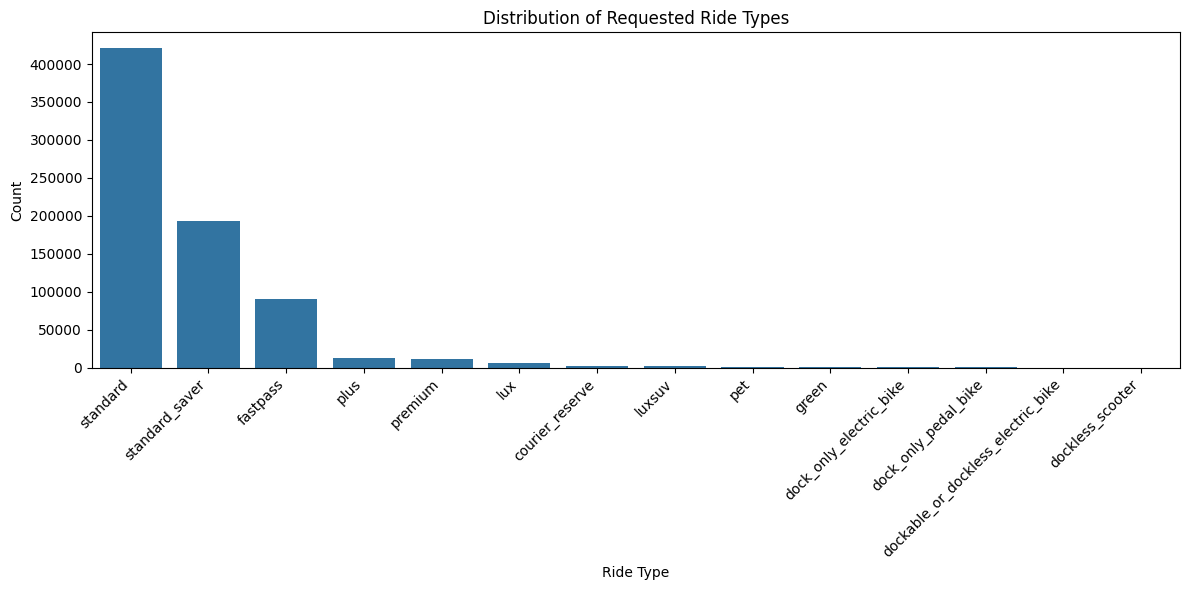


Percentage Distribution of Requested Ride Types:
--------------------------------------------------
standard: 56.83%
standard_saver: 26.14%
fastpass: 12.23%
plus: 1.7%
premium: 1.46%
lux: 0.87%
courier_reserve: 0.3%
luxsuv: 0.26%
pet: 0.07%
green: 0.07%
dock_only_electric_bike: 0.03%
dock_only_pedal_bike: 0.02%
dockable_or_dockless_electric_bike: 0.01%
dockless_scooter: 0.0%


In [19]:
# Plot distribution of requested ride types
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
ride_type_counts = df_train['requested_ride_type'].value_counts()
sns.barplot(x=ride_type_counts.index, y=ride_type_counts.values)
plt.title('Distribution of Requested Ride Types')
plt.xlabel('Ride Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print percentage distribution
print("\nPercentage Distribution of Requested Ride Types:")
print("-" * 50)
ride_type_pcts = (ride_type_counts / len(df_train) * 100).round(2)
for ride_type, pct in ride_type_pcts.items():
    print(f"{ride_type}: {pct}%")
